In [1]:
import sys

from datetime import datetime, timedelta

import biosppy as bp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from ltbio.biosignals import modalities, Event
from ltbio.biosignals.modalities.ECG import ECG
from ltbio.biosignals.sources.BitalinoShort import BitalinoShort
from ltbio.biosignals.sources.HEM import HEM
from ltbio.processing.filters import TimeDomainFilter, ConvolutionOperation
from ltbio.processing.filters import FrequencyResponse, FrequencyDomainFilter, BandType


In [2]:


path_hosp = 'G:\\PreEpiSeizures\\Patients_HEM\\FCSFDM\\ficheiros'
ecg_hosp = ECG(path_hosp, HEM)

In [3]:
def ecg_quality(sig, sampling_rate):
    beats = bp.signals.ecg.hamilton_segmenter(sig, sampling_rate=sampling_rate)['rpeaks']
    beats = bp.signals.ecg.correct_rpeaks(signal= sig, rpeaks=beats, sampling_rate=sampling_rate)['rpeaks']
    hridx, hr =bp.signals.tools.get_heart_rate(beats, sampling_rate=sampling_rate)
    sqi = bp.signals.ecg.ecgSQI(signal=sig, rpeaks=beats, sqi_metrics={'kSQI', 'pSQI', 'basSQI'}, fs=sampling_rate)
    sqi['hrmean'] = np.mean(hr)
    sqi['hrmax'] = np.max(hr)
    sqi['hrvar'] = np.var(hr)
    sqi['hrmed'] = np.median(hr)
    return sqi

def calculate_sqi(id0, ecg_bit, ecg_hosp):

    df_sqi = pd.DataFrame(columns=['id0','id1', 'kSQI', 'pSQI', 'basSQI', 'hrmean', 'hrmax', 'hrvar', 'hrmed', 'source', 'duration'])


    for i in range(len(ecg_bit.domain)):
        try:
            hosp_sig = ecg_hosp['ecg'][ecg_bit.domain[i]].to_array()
            bit_sig = ecg_bit[ecg_bit.domain[i]].to_array()
        except:
            print('Error')
            continue
        duration = len(ecg_hosp['ecg'][ecg_bit.domain[i]]) / ecg_hosp['ecg'].sampling_frequency
        print(duration)
        bit_sqi = ecg_quality(bit_sig, sampling_rate=ecg_bit.sampling_frequency)
        bit_sqi['source'] = 'Bitalino'
        bit_sqi['duration'] = duration
        bit_sqi['id1'] = i
        bit_sqi['id0'] = id0
        hosp_sqi = ecg_quality(hosp_sig, sampling_rate=ecg_hosp['ecg'].sampling_frequency)
        hosp_sqi['source'] = 'Hospital'
        hosp_sqi['duration'] = duration
        hosp_sqi['id1'] = i
        hosp_sqi['id0'] = id0

        df_sqi = pd.concat((df_sqi, pd.DataFrame(bit_sqi, index=[0])), ignore_index=True)
        df_sqi = pd.concat((df_sqi, pd.DataFrame(hosp_sqi, index=[0])), ignore_index=True)

    return df_sqi

In [4]:

path_bit = 'G:\\PreEpiSeizures\\Patients_HEM\\FCSFDM\\Bitalino'
df_sqi = pd.DataFrame()
id0 = 0
while id0 < len(ecg_hosp['ecg'].domain):
    options = {'date1': ecg_hosp['ecg'].domain[id0].start_datetime, 'date2': ecg_hosp['ecg'].domain[id0].end_datetime}
    try:
        ecg_bit = ECG(path_bit, BitalinoShort, **options)
    except:
        ecg_bit = []

    if ecg_bit:
        df_new = calculate_sqi(id0, ecg_bit, ecg_hosp)
        df_sqi = pd.concat((df_sqi, df_new), ignore_index=True)
    id0 += 1


1944.5
892.2521750520344 1548.285663247566
43.188257544851545 1860.5700860980912
12110.942596435547 19483.694169044495
8189.901611328125 41830.740555763245
759.796875
1487.2561424703854 2703.694683270022
132.5450786447975 3550.5156175150014
35855.136322021484 49988.08941268921
373314.00390625 504750.2953453064
714.3984375
1296.2022482320815 2388.6539961733165
30.946961196455558 2802.800859144783
12675.465393066406 20620.82138442993
19310.142822265625 54477.70502090454
74.8671875
1062.5324236816605 2006.5191888366587
32.38090570322206 2426.626074729581
11478.483741760254 20124.586029052734
5648.281677246094 39362.98051452637
186.69921875
1030.0231779779717 1917.870440377176
32.22274895029031 2317.292301665633
11924.302230834961 20558.005633354187
6982.8585205078125 43335.6092710495
8.19921875
1081.3538867528025 1996.430776856282
33.156839970106155 2387.878340780415
11587.929996490479 20813.681180000305
3143.0419311523438 46641.768078804016
67.09765625
1069.090737491663 2003.203230405301

C:\Users\Mariana\AppData\Local\Continuum\anaconda3\envs\py310\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 1024 is greater than input length  = 640, using nperseg = 640
  warnings.warn('nperseg = {0:d} is greater than input length '


1480.0423256835775 2438.5303617795603
44.557369772539374 2954.1147053954583
9622.996841430664 14961.426550865173
47272.0400390625 74400.47247982025
706.5
1410.7880231186352 2269.540653525063
42.69623061953544 2743.863565678644
7445.793716430664 11787.205735206604
628.4331512451172 17940.6788854599
31.09765625
1772.3395940909802 2764.952916855346
5562.051164984073 18177.5809312239
7431.2784061431885 11614.146073818207
676.7526893615723 17658.219754695892
Error
1739.69921875
1192.0729815715056 1904.1301221358447
46.87099433665879 2370.916762462887
3360.066777229309 5067.228030562401
25772.636962890625 33597.35333383083
1199.296875
1302.8277195099963 2090.2916477303684
169.69598055915225 2958.3078253613767
3731.4632396698 5939.062832355499
32965.157470703125 42614.05884599686
395.09765625
1485.9639497999497 2368.625217714403
64.51653496874815 3017.93723308028
4231.045705795288 6272.0937823057175
8754.599822998047 18571.90750491619
2027.69921875
1162.3249379548486 1865.680584089687
88.3800

ValueError: Not enough beats to compute heart rate.

In [ ]:
id0 = 6
options = {'date1': ecg_hosp['ecg'].domain[id0].start_datetime, 'date2': ecg_hosp['ecg'].domain[id0].end_datetime}
ecg_bit = ECG(path_bit, BitalinoShort, **options)
i=0
bit_sig = bp.signals.tools.filter_signal(ecg_bit[ecg_bit.domain[i]].to_array(), ftype='FIR', band='bandpass', order=int(ecg_bit.sampling_frequency // 3), frequency=[0.25, 45], sampling_rate=ecg_bit.sampling_frequency)['signal']

In [ ]:
plt.plot(ecg_bit[ecg_bit.domain[i]].to_array()[200000:220000])
print(ecg_quality(bit_sig, ecg_bit.sampling_frequency))
print(ecg_quality(ecg_bit[ecg_bit.domain[i]].to_array(), ecg_bit.sampling_frequency))


In [49]:

colors = ['#843C0C', '#003399', '#843C0C']
sns.set_palette(sns.color_palette(colors))
colors = {'lightblue': '#A9D1ED', 'lightorange': '#F8CBAD',  'darkblue': '#003399', 'onset': '#843C0C', 'teal':'teal', }

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


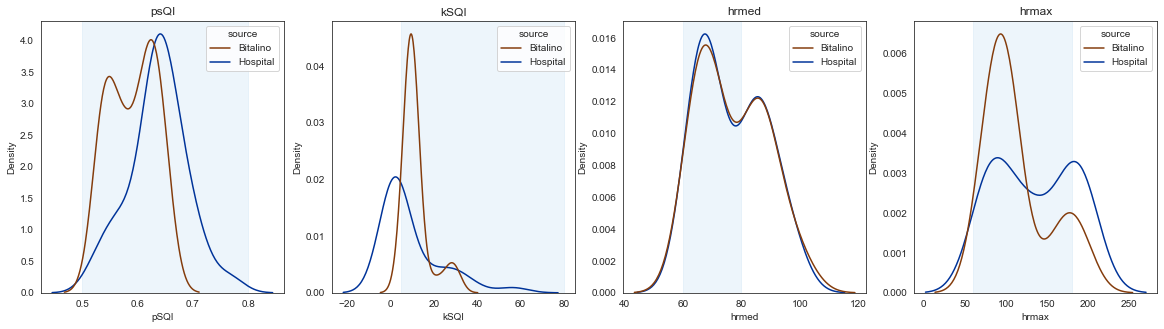

In [50]:
sns.set_style(style='white')
fig, axes = plt.subplots(1, 4, figsize=(20,5))

axes[0].set_title('psQI')
sns.kdeplot(data = df_sqi, x='pSQI', hue='source', ax=axes[0])
axes[0].axvspan(0.5, 0.8, alpha=0.2, color=colors['lightblue'])
axes[1].set_title('kSQI')
sns.kdeplot(data = df_sqi, x='kSQI', hue='source', ax=axes[1])
axes[1].axvspan(5, 80, alpha=0.2, color=colors['lightblue'])
axes[2].set_title('hrmed')
sns.kdeplot(data = df_sqi, x='hrmed', hue='source', ax=axes[2])
axes[2].axvspan(60, 80, alpha=0.2, color=colors['lightblue'])
axes[3].set_title('hrmax')
sns.kdeplot(data = df_sqi, x='hrmax', hue='source', ax=axes[3])
axes[3].axvspan(60, 180, alpha=0.2, color=colors['lightblue'])

figname = 'C:\\Users\\Mariana\\Documents\\CAT\\images\\signal_quality'
plt.savefig(figname + '.png')
plt.savefig(figname + '.eps', format='eps')

In [56]:
new_df = pd.DataFrame(columns=['values', 'metric', 'source'])

for i in range(len(df_sqi)):
    for col in ['hrvar', 'hrmed', 'hrmean', 'hrmax', 'kSQI', 'pSQI']:
        # norm_vals = (df_sqi.iloc[i][col] - np.mean(df_sqi[col])) / (np.std(df_sqi[col]))
        new_df = pd.concat((new_df, pd.DataFrame({'values': df_sqi.iloc[i][col], 'metric': col, 'source': df_sqi.iloc[i]['source']}, index=[0])), ignore_index=True)


In [39]:
diff_df = pd.DataFrame()

for i in range(0, len(df_sqi.loc[df_sqi['source']=='Bitalino']), 2):
    new_row = {}
    for col in df_sqi.columns:
        if col not in ['source', 'id0', 'id1', 'duration']:
            norm_vals = df_sqi.iloc[i+1][col] - df_sqi.iloc[i][col]
            new_row[col] = norm_vals
    diff_df = pd.concat((diff_df, pd.DataFrame(new_row, index=[0])), ignore_index=True)
diff_df

,kSQI,pSQI,basSQI,hrmean,hrmax,hrvar,hrmed
0,0.000000,0.045310,-0.173088,0.843038,19.175084,71.535921,0.037262
1,-1.269051,0.167191,-0.702550,-0.045947,55.939850,304.916047,-3.061304
2,0.971184,0.072043,-0.343757,0.756511,81.254013,64.333887,0.226950
3,-1.307071,0.040831,-0.130535,0.070383,1.066706,-0.526765,0.074459
4,-1.436660,0.042966,-0.147638,-0.396557,0.498316,-1.184487,-0.645276
5,-1.551565,0.015102,-0.053899,2.767324,2.391999,-20.813939,1.066045
6,-1.370343,0.035045,-0.112273,-1.461456,-4.541136,2.420299,-0.809880
7,-1.017525,-0.010461,-0.362426,-0.137842,47.088379,35.266460,-0.008505
8,-1.231568,-0.003089,-0.070378,0.441157,16.533045,0.850429,0.326626
9,1.101953,0.067569,-0.200084,0.486209,76.049212,44.760182,-0.111438


In [57]:
new_df

,values,metric,source
0,18.856653,hrvar,Bitalino
1,74.165637,hrmed,Bitalino
2,74.706032,hrmean,Bitalino
3,170.454545,hrmax,Bitalino
4,3,kSQI,Bitalino
...,...,...,...
379,61.195219,hrmed,Hospital
380,63.173527,hrmean,Hospital
381,189.62963,hrmax,Hospital
382,1.254333,kSQI,Hospital


<Figure size 1440x360 with 0 Axes>

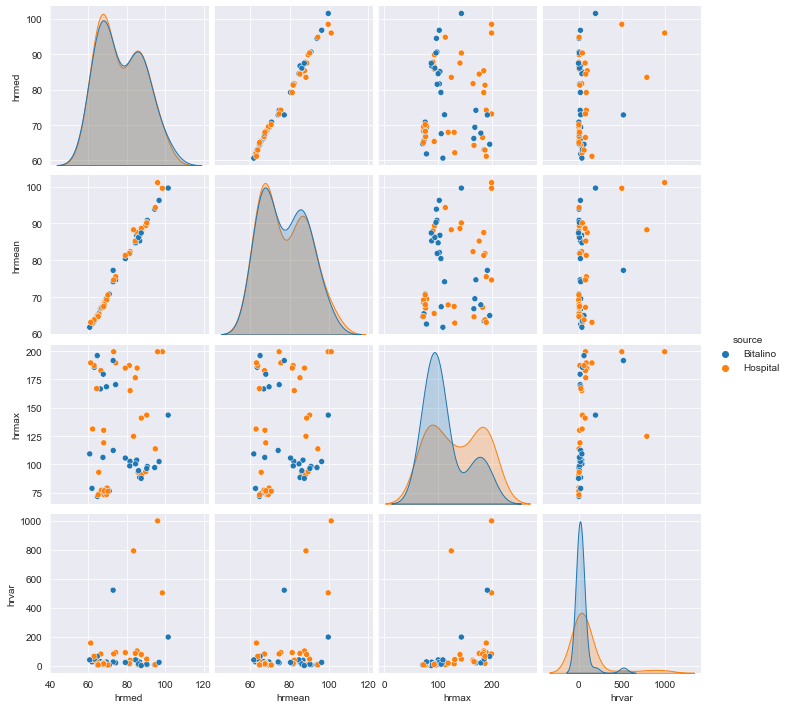

In [65]:
plt.figure(figsize=(20,5))
sns.pairplot(data=df_sqi[['hrmed', 'hrmean', 'hrmax', 'hrvar', 'source']], hue='source')

In [72]:
sns.violinplot(data=new_df, x='values', y='metric', hue='source')

ValueError: object arrays are not supported

In [15]:
date1 = datetime(2021, 4, 15, 11, 41, 33)
date2 = datetime(2021, 4, 15, 11, 49, 32)
#date2 = datetime(2021, 4, 15, 11, 42, 32)
crop_bit = ecg_bit[date1: date2]
crop_ecg = (ecg_hosp['ecg'][date1:date2].to_array())
time_bit = pd.date_range(date1, date2, periods=len(crop_bit))
time_hosp = pd.date_range(date1, date2, periods=len(crop_ecg))

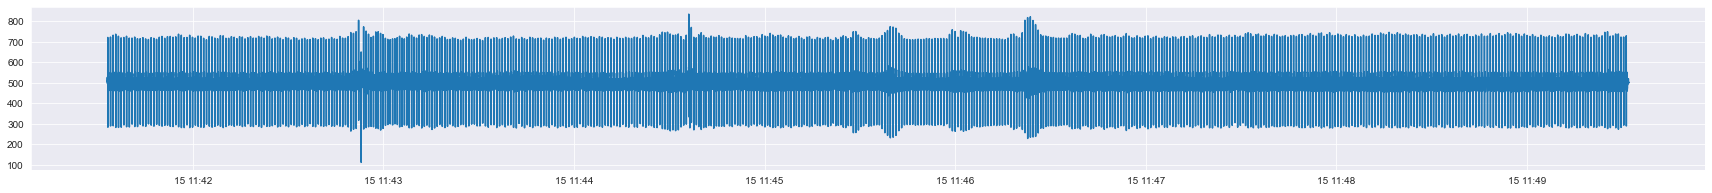

In [16]:
plt.figure(figsize=(30, 3))

plt.plot(time_bit, crop_bit.to_array())
#plt.plot(time_hosp, crop_ecg)


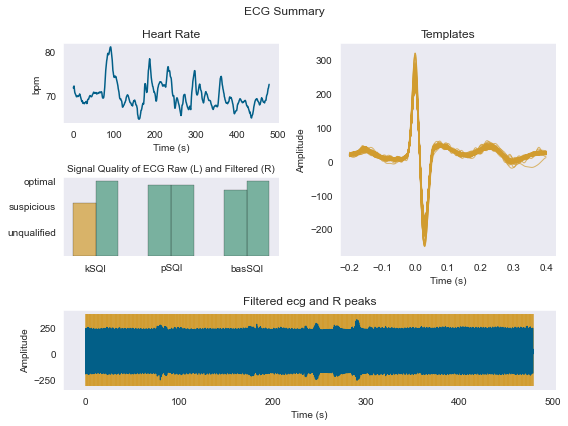

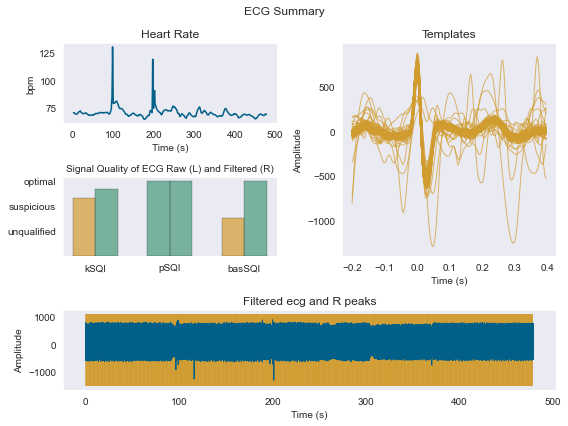

ReturnTuple(ts=array([0.00000000e+00, 3.90625000e-03, 7.81250000e-03, ...,
       4.78988281e+02, 4.78992188e+02, 4.78996094e+02]), filtered=array([-0.54693161, -6.0360597 , -7.94699012, ..., 13.75145377,
       16.47437547, 14.63693164]), rpeaks=array([   237,    454,    675,    891,   1110,   1331,   1551,   1772,
         1995,   2218,   2438,   2660,   2882,   3101,   3318,   3536,
         3753,   3967,   4181,   4397,   4609,   4821,   5036,   5254,
         5473,   5690,   5909,   6130,   6349,   6571,   6791,   7010,
         7230,   7452,   7670,   7890,   8110,   8328,   8545,   8767,
         8988,   9208,   9433,   9657,   9879,  10103,  10330,  10556,
        10779,  11004,  11231,  11456,  11680,  11905,  12130,  12353,
        12577,  12804,  13029,  13253,  13473,  13697,  13919,  14140,
        14360,  14581,  14800,  15019,  15240,  15461,  15681,  15902,
        16122,  16339,  16558,  16778,  16994,  17210,  17429,  17647,
        17863,  18082,  18301,  18517,  187

In [17]:
bp.signals.ecg.ecg(crop_bit.to_array(), interactive=False)
bp.signals.ecg.ecg(crop_ecg, interactive=False, sampling_rate=256)

In [46]:
import

'C:\\Users\\Mariana\\PycharmProjects\\IT-LongTermBiosignals\\research_journal\\05-09-2022'

<Figure size 2160x360 with 0 Axes>

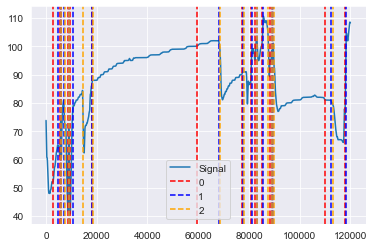

In [165]:
plt.figure(figsize=(30,5))
eda_signal = eda_[:].to_array()
signals, info = nk.eda_process(eda_signal, sampling_rate=1000.)
cleaned = signals["EDA_Clean"]
features = [info["SCR_Onsets"], info["SCR_Peaks"], info["SCR_Recovery"]]
plot = nk.events_plot(features, cleaned, color=['red', 'blue', 'orange'])

In [181]:
signals

,EDA_Raw,EDA_Clean,EDA_Tonic,EDA_Phasic,SCR_Onsets,SCR_Peaks,SCR_Height,SCR_Amplitude,SCR_RiseTime,SCR_Recovery,SCR_RecoveryTime
0,75.0,73.773373,65.339966,8.433407,0,0,0.0,0.0,0.0,0,0.0
1,75.0,73.724226,65.338425,8.385801,0,0,0.0,0.0,0.0,0,0.0
2,75.0,73.674661,65.336884,8.337777,0,0,0.0,0.0,0.0,0,0.0
3,75.0,73.624682,65.335343,8.289339,0,0,0.0,0.0,0.0,0,0.0
4,75.0,73.574292,65.333803,8.240490,0,0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
119995,107.0,108.365295,76.909231,0.141066,0,0,0.0,0.0,0.0,0,0.0
119996,107.0,108.365290,76.909231,0.130226,0,0,0.0,0.0,0.0,0,0.0
119997,107.0,108.365285,76.909231,0.119385,0,0,0.0,0.0,0.0,0,0.0
119998,107.0,108.365281,76.909231,0.108544,0,0,0.0,0.0,0.0,0,0.0


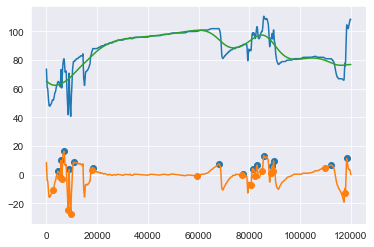

In [180]:
plt.plot(signals['EDA_Clean'], label='EDA clean')
plt.plot(signals['EDA_Phasic'], label='EDA Phasic')
plt.plot(signals['EDA_Tonic'], label='EDA Tonic')
plt.scatter(info['SCR_Peaks'], signals['EDA_Phasic'][info['SCR_Peaks']], label='peaks')
plt.scatter(info['SCR_Onsets'], signals['EDA_Phasic'][info['SCR_Onsets']], label='onsets')


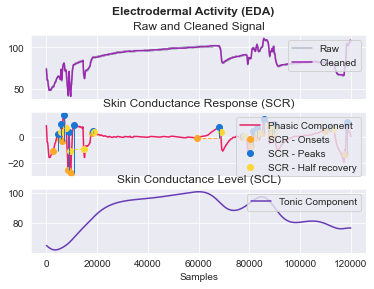

In [178]:
data = nk.eda_phasic(nk.standardize(eda_signal), sampling_rate=1000.)
data["EDA_Raw"] = nk.standardize(eda_signal)  # Add raw signal
#data.plot()
nk.eda_plot(signals)

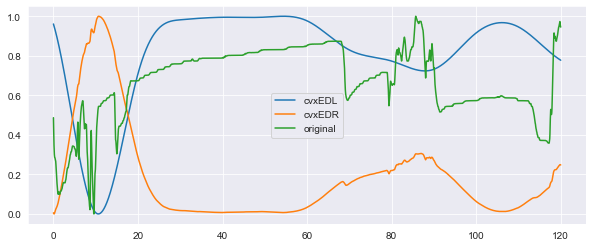

In [139]:
tm = np.arange(1., len(y)+1.) / Fs
#plt.plot(tm, r)
plt.figure(figsize=(10, 4))
plt.plot(tm, (cvxEDL - cvxEDL.min())/(cvxEDL.max() - cvxEDL.min()), label='cvxEDL')
#plt.plot(tm, (yn - yn.min())/(yn.max() - yn.min()), label='original')
plt.plot(tm, (cvxEDR - cvxEDR.min())/(cvxEDR.max() - cvxEDR.min()), label='cvxEDR')
plt.plot(tm, (eda_sig- np.min(eda_sig))/(np.max(eda_sig)-np.min(eda_sig)), label='original')

#plt.plot(tm, cvxEDL, label='cvxEDL')
#plt.plot(tm, cvxEDR, label='cvxEDR')
plt.legend()

In [234]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
colors = {'lightblue': '#A9D1ED', 'lightorange': '#F8CBAD',  'darkblue': '#003399', 'onset': '#843C0C', 'teal':'teal', }
legend_elements_ax1 = [Line2D([0], [0], color=colors['lightblue'], lw=3, label='EDA'),
                   Line2D([0], [0], color=colors['teal'], lw=3, label='SCL'),
                   #Line2D([0], [0], color=colors['teal'], lw=3, label='Z'),
                   Line2D([0], [0], color='grey', lw=3, label='preictal', linestyle='dashed'),
                   Line2D([0], [0], color='grey', lw=3, label='ictal'),
                   Line2D([0], [0], color=colors['onset'], lw=3, label='onset'),
                   ]

legend_elements_ax2 = [Line2D([0], [0], color=colors['lightblue'], lw=3, label='SCR'),
                   Line2D([0], [0], marker='o', label='SCR peaks', markerfacecolor=colors['lightorange'], markersize=15, color='w'),

                   #Line2D([0], [0], color=colors['teal'], lw=3, label='Z'),
                   Line2D([0], [0], color='grey', lw=3, label='preictal', linestyle='dashed'),
                   Line2D([0], [0], color='grey', lw=3, label='ictal'),
                   Line2D([0], [0], color=colors['onset'], lw=3, label='onset'),
                   ]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


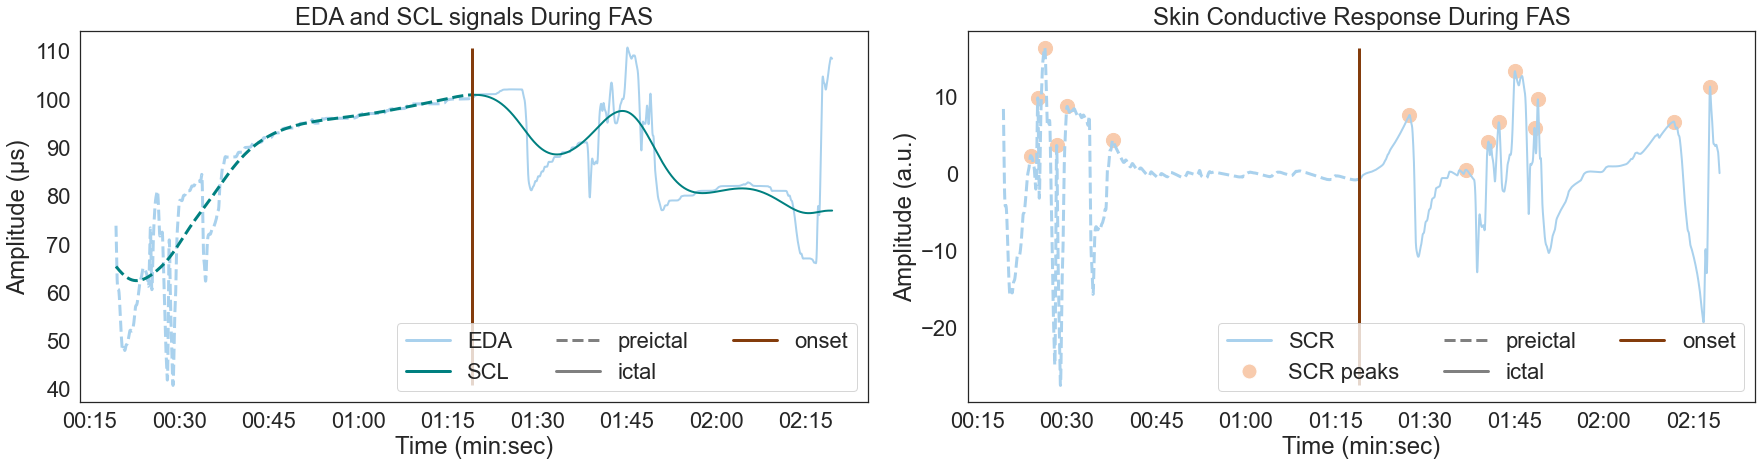

In [239]:
sb.set(font_scale=2)
sb.set_style(style='white')
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(25, 7))
colors = {'lightblue': '#A9D1ED', 'lightorange': '#F8CBAD',  'darkblue': '#003399', 'onset': '#843C0C', 'teal':'teal', }
# plt.title('Respiratory Rate During Seizure')

ax1.set_ylabel('Amplitude (\u03BCs)')
ax2.set_xlabel('Time (min:sec)')
ax2.set_ylabel('Amplitude (a.u.)')
ax1.set_xlabel('Time (min:sec)')
ax1.set_title('EDA and SCL signals During FAS')
ax2.set_title('Skin Conductive Response During FAS')

x_axis = pd.date_range(eda_.initial_datetime, eda_.final_datetime, periods=len(eda_[:]))
ax1.plot(x_axis[x_axis <= event1.onset], signals['EDA_Clean'][:len(x_axis[x_axis <= event1.onset])], linewidth=3,
         color=colors['lightblue'], linestyle='dashed')
ax1.plot(x_axis[x_axis <= event1.onset], signals['EDA_Tonic'][:len(x_axis[x_axis <= event1.onset])], linewidth=3,
         color=colors['teal'], linestyle='dashed')
ax2.plot(x_axis[x_axis <= event1.onset], signals['EDA_Phasic'][:len(x_axis[x_axis <= event1.onset])], linewidth=3,
         color=colors['lightblue'], linestyle='dashed')
# get peaks
onset_idx = len(x_axis[x_axis <= event1.onset])
peaks = info['SCR_Peaks'][info['SCR_Peaks']<=onset_idx]
ax2.scatter(x_axis[x_axis <= event1.onset][peaks], signals['EDA_Phasic'][peaks], s=200,
         color=colors['lightorange'], label='preictal', marker='o')

ax1.plot(x_axis[x_axis >= event1.onset], signals['EDA_Clean'][-len(x_axis[x_axis >= event1.onset]):], linewidth=2, color=colors['lightblue'], label='ictal')
ax1.plot(x_axis[x_axis >= event1.onset], signals['EDA_Tonic'][-len(x_axis[x_axis >= event1.onset]):], linewidth=2, color=colors['teal'], label='ictal')
ax2.plot(x_axis[x_axis >= event1.onset], signals['EDA_Phasic'][-len(x_axis[x_axis >= event1.onset]):], linewidth=2, color=colors['lightblue'], label='SCR')
peaks = info['SCR_Peaks'][info['SCR_Peaks']>onset_idx]
ax2.scatter(x_axis[x_axis >= event1.onset][peaks-onset_idx], signals['EDA_Phasic'][peaks],
         color=colors['lightorange'], label='ictal', marker='o', s=200)

from matplotlib.dates import DateFormatter
ax1.vlines(event1.onset, np.max(signals['EDA_Clean']), np.min(signals['EDA_Clean']), color= colors['onset'], label='Seizure Onset', linewidth=3)
ax2.vlines(event1.onset, np.max(signals['EDA_Phasic']), np.min(signals['EDA_Phasic']), color= colors['onset'], label='Seizure Onset', linewidth=3)

ax1.xaxis.set_major_formatter(DateFormatter('%M:%S'))
ax2.xaxis.set_major_formatter(DateFormatter('%M:%S'))


ax1.legend(handles=legend_elements_ax1, loc='lower right', ncol=3)

ax2.legend(handles=legend_elements_ax2, loc='lower right', ncol=3)
plt.tight_layout()
figname = 'C:\\Users\\Mariana\\Documents\\Epilepsy\\images\\eda_during_seizure'
plt.savefig(figname + '.png')
plt.savefig(figname + '.eps', format='eps')
plt.show()
